In [1]:
import networkx as nx

In [9]:
my_graph = nx.Graph()
my_graph.add_node(1)
my_graph.add_nodes_from([2, 3])
my_graph.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])

In [23]:
graph_other = nx.path_graph(10)
my_graph.add_nodes_from(graph_other)
my_graph.add_node(graph_other)

In [29]:
my_graph.add_edge(1, 2)
e = (2, 3)
my_graph.add_edge(*e)

my_graph.add_edges_from([(1, 2), (1, 3),(2, 3, {'weight': 3.1415})])
list(my_graph.edges)

[(1, 2), (1, 3), (2, 3)]

In [30]:
my_graph.clear()

In [45]:
G = nx.DiGraph()
G.add_edge(2, 1)   # adds the nodes in order 2, 1
G.add_edge(1, 3)
G.add_edge(2, 4)
G.add_edge(1, 2)
G.add_edge(3,2)
assert list(G.successors(2)) == [1, 4]
assert list(G.edges) == [(2, 1), (2, 4), (1, 3), (1, 2),(3, 2)]
print(list(G.nodes))
print(list(G.edges))
print(list(G.adj[1]))  # or list(G.neighbors(1))
print(G.degree[1])  # the number of edges incident to 1

[2, 1, 3, 4]
[(2, 1), (2, 4), (1, 3), (1, 2), (3, 2)]
[3, 2]
3


In [50]:

G.add_edge(4,1)
G.add_edge(4,5)
G.add_edge(5,1)
G.add_edge(2,5)
G.add_edge(6,5)
G.add_edge(1,6)
G.add_edge(3,5)
G.add_edge(4,6)
G.remove_node(3)
G.remove_nodes_from('4')
G.remove_nodes_from('5')
G.remove_edge(6, 5)

In [8]:
G = nx.Graph([(1, 2, {"color": "yellow"})])
G.add_edge(1, 3)
G[1][3]['color']= 'green'
print(G[1])  # same as G.adj[1]
print(G[1][2])
print(G[1][2]['color'])
print(G[1][3]['color'])

{2: {'color': 'yellow'}, 3: {'color': 'green'}}
{'color': 'yellow'}
yellow
green


In [9]:
G = nx.Graph(day="Friday")
print(G.graph)
G.graph['year'] = "2021"
print(G.graph)


{'day': 'Friday'}
{'day': 'Friday', 'year': '2021'}


In [14]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
   for nbr, eattr in nbrs.items():
       wt = eattr['weight']
       if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")
print()
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5:
        print(f"({u}, {v}, {wt:.3})")

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)

(1, 2, 0.125)
(3, 4, 0.375)


In [2]:
import numpy as np

def generate_random_graph(num = 10, rand_num = 20):
    G = nx.Graph()
    rand = lambda: np.random.randint(0,rand_num)
    rand_norm = lambda:np.random.random()
    for i in range(num):
        u = rand()
        v = rand()
        while v==u:
            v = rand()
        G.add_edge(u,v, weight=rand_norm())
    return G

def print_graph(G):
    for u,v,attr in G.edges.data('weight'):
        print(f'node1 = {u}, node2 = {v} , weight = {attr:.3}')

G = generate_random_graph()
H = generate_random_graph()

print("G graph:")
print_graph(G)
    
print("\nH graph:")
print_graph(H)

G graph:
node1 = 3, node2 = 5 , weight = 0.267
node1 = 3, node2 = 17 , weight = 0.806
node1 = 10, node2 = 18 , weight = 0.876
node1 = 10, node2 = 7 , weight = 0.162
node1 = 18, node2 = 19 , weight = 0.815
node1 = 7, node2 = 9 , weight = 0.571
node1 = 9, node2 = 1 , weight = 0.123
node1 = 2, node2 = 0 , weight = 0.316
node1 = 0, node2 = 4 , weight = 0.013
node1 = 15, node2 = 12 , weight = 0.0999

H graph:
node1 = 1, node2 = 4 , weight = 0.425
node1 = 1, node2 = 5 , weight = 0.477
node1 = 1, node2 = 16 , weight = 0.332
node1 = 6, node2 = 12 , weight = 0.158
node1 = 9, node2 = 11 , weight = 0.27
node1 = 11, node2 = 16 , weight = 0.621
node1 = 17, node2 = 14 , weight = 0.575
node1 = 17, node2 = 0 , weight = 0.0917
node1 = 17, node2 = 2 , weight = 0.973
node1 = 14, node2 = 3 , weight = 0.863


In [3]:
'''
disjoint_union(G, H)
    Return the disjoint union of graphs G and H.
    
    This algorithm forces distinct integer node labels.
    
    Parameters
    ----------
    G,H : graph
       A NetworkX graph
    
    Returns
    -------
    U : A union graph with the same type as G.
'''
G_union = nx.disjoint_union(G,H)
print_graph(G_union)

node1 = 0, node2 = 1 , weight = 0.267
node1 = 0, node2 = 6 , weight = 0.806
node1 = 2, node2 = 3 , weight = 0.876
node1 = 2, node2 = 4 , weight = 0.162
node1 = 3, node2 = 7 , weight = 0.815
node1 = 4, node2 = 5 , weight = 0.571
node1 = 5, node2 = 11 , weight = 0.123
node1 = 8, node2 = 9 , weight = 0.316
node1 = 9, node2 = 10 , weight = 0.013
node1 = 12, node2 = 13 , weight = 0.0999
node1 = 14, node2 = 15 , weight = 0.425
node1 = 14, node2 = 23 , weight = 0.477
node1 = 14, node2 = 24 , weight = 0.332
node1 = 16, node2 = 17 , weight = 0.158
node1 = 18, node2 = 19 , weight = 0.27
node1 = 19, node2 = 24 , weight = 0.621
node1 = 20, node2 = 21 , weight = 0.575
node1 = 20, node2 = 22 , weight = 0.0917
node1 = 20, node2 = 25 , weight = 0.973
node1 = 21, node2 = 26 , weight = 0.863


In [4]:
'''
subgraph(G, nbunch)
    Returns the subgraph induced on nodes in nbunch.
    
    Parameters
    ----------
    G : graph
       A NetworkX graph
    
    nbunch : list, iterable
       A container of nodes that will be iterated through once (thus
       it should be an iterator or be iterable).  Each element of the
       container should be a valid node type: any hashable type except
       None.  If nbunch is None, return all edges data in the graph.
       Nodes in nbunch that are not in the graph will be (quietly)
       ignored.
'''
G_sub = nx.subgraph(G,list(range(10)))
print_graph(G_sub)

node1 = 3, node2 = 5 , weight = 0.267
node1 = 7, node2 = 9 , weight = 0.571
node1 = 9, node2 = 1 , weight = 0.123
node1 = 2, node2 = 0 , weight = 0.316
node1 = 0, node2 = 4 , weight = 0.013


In [5]:
'''
cartesian_product(G, H)
    Returns the Cartesian product of G and H.
    
    The Cartesian product $P$ of the graphs $G$ and $H$ has a node set that
    is the Cartesian product of the node sets, $V(P)=V(G) \times V(H)$.
    $P$ has an edge $((u,v),(x,y))$ if and only if either $u$ is equal to $x$
    and both $v$ and $y$ are adjacent in $H$ or if $v$ is equal to $y$ and
    both $u$ and $x$ are adjacent in $G$.
    
    Parameters
    ----------
    G, H: graphs
     Networkx graphs.
    
    Returns
    -------
    P: NetworkX graph
     The Cartesian product of G and H. P will be a multi-graph if either G
     or H is a multi-graph. Will be a directed if G and H are directed,
     and undirected if G and H are undirected.
    
    Raises
    ------
    NetworkXError
     If G and H are not both directed or both undirected.
    
'''
G_cartesian = nx.cartesian_product(G,H)

In [6]:
'''
compose(G, H)
    Returns a new graph of G composed with H.
    
    Composition is the simple union of the node sets and edge sets.
    The node sets of G and H do not need to be disjoint.
    
    Parameters
    ----------
    G, H : graph
       A NetworkX graph
    
    Returns
    -------
    C: A new graph  with the same type as G
'''
G_compose = nx.compose(G,H)
print_graph(G_compose)

node1 = 3, node2 = 5 , weight = 0.267
node1 = 3, node2 = 17 , weight = 0.806
node1 = 3, node2 = 14 , weight = 0.863
node1 = 5, node2 = 1 , weight = 0.477
node1 = 10, node2 = 18 , weight = 0.876
node1 = 10, node2 = 7 , weight = 0.162
node1 = 18, node2 = 19 , weight = 0.815
node1 = 7, node2 = 9 , weight = 0.571
node1 = 9, node2 = 1 , weight = 0.123
node1 = 9, node2 = 11 , weight = 0.27
node1 = 17, node2 = 14 , weight = 0.575
node1 = 17, node2 = 0 , weight = 0.0917
node1 = 17, node2 = 2 , weight = 0.973
node1 = 2, node2 = 0 , weight = 0.316
node1 = 0, node2 = 4 , weight = 0.013
node1 = 4, node2 = 1 , weight = 0.425
node1 = 1, node2 = 16 , weight = 0.332
node1 = 15, node2 = 12 , weight = 0.0999
node1 = 12, node2 = 6 , weight = 0.158
node1 = 11, node2 = 16 , weight = 0.621


In [7]:
'''
complement(G)
    Returns the graph complement of G.
    
    Parameters
    ----------
    G : graph
       A NetworkX graph
    
    Returns
    -------
    GC : A new graph.
    
'''

GC = nx.complement(G)
for v , attr in GC.adj.items():
    print()
    for u ,val in attr.items(): 
        print(f'node1 = {v}, node2 = {u}')


node1 = 3, node2 = 10
node1 = 3, node2 = 18
node1 = 3, node2 = 7
node1 = 3, node2 = 9
node1 = 3, node2 = 19
node1 = 3, node2 = 2
node1 = 3, node2 = 0
node1 = 3, node2 = 4
node1 = 3, node2 = 1
node1 = 3, node2 = 15
node1 = 3, node2 = 12

node1 = 5, node2 = 10
node1 = 5, node2 = 18
node1 = 5, node2 = 7
node1 = 5, node2 = 9
node1 = 5, node2 = 17
node1 = 5, node2 = 19
node1 = 5, node2 = 2
node1 = 5, node2 = 0
node1 = 5, node2 = 4
node1 = 5, node2 = 1
node1 = 5, node2 = 15
node1 = 5, node2 = 12

node1 = 10, node2 = 3
node1 = 10, node2 = 5
node1 = 10, node2 = 9
node1 = 10, node2 = 17
node1 = 10, node2 = 19
node1 = 10, node2 = 2
node1 = 10, node2 = 0
node1 = 10, node2 = 4
node1 = 10, node2 = 1
node1 = 10, node2 = 15
node1 = 10, node2 = 12

node1 = 18, node2 = 3
node1 = 18, node2 = 5
node1 = 18, node2 = 7
node1 = 18, node2 = 9
node1 = 18, node2 = 17
node1 = 18, node2 = 2
node1 = 18, node2 = 0
node1 = 18, node2 = 4
node1 = 18, node2 = 1
node1 = 18, node2 = 15
node1 = 18, node2 = 12

node1 = 7,

In [8]:
'''
create_empty_copy(G, with_data=True)
    Returns a copy of the graph G with all of the edges removed.
    
    Parameters
    ----------
    G : graph
       A NetworkX graph
    
    with_data :  bool (default=True)
       Propagate Graph and Nodes data to the new graph.
    
'''
G_empty = nx.create_empty_copy(G)
print(f'G num of nodes = {len(G.nodes)}, G_empty num of nodes = {len(G_empty.nodes)}')
print(f'G num of edges = {len(G.edges)}, G_empty num of edges = {len(G_empty.edges)}')

G num of nodes = 14, G_empty num of nodes = 14
G num of edges = 10, G_empty num of edges = 0


In [9]:
'''
to_directed(graph)
    Returns a directed view of the graph `graph`.
    
    Identical to graph.to_directed(as_view=True)
    Note that graph.to_directed defaults to `as_view=False`
    while this function always provides a view.
'''
# fozen directed graph
G_directed = nx.to_directed(G)
# just a directed graph
G_directed = G.to_directed(as_view = False)
first_node= list(G_directed.nodes)[0]
node_neighbor = list(G_directed.adj[first_node])[0]
# removing the first edge
G_directed.remove_edge(first_node,node_neighbor)
for v , attr in G_directed.adj.items():
    print()
    for u ,val in attr.items(): 
        print(f'node1 = {v}, node2 = {u}')


node1 = 3, node2 = 17

node1 = 5, node2 = 3

node1 = 10, node2 = 18
node1 = 10, node2 = 7

node1 = 18, node2 = 10
node1 = 18, node2 = 19

node1 = 7, node2 = 9
node1 = 7, node2 = 10

node1 = 9, node2 = 7
node1 = 9, node2 = 1

node1 = 17, node2 = 3

node1 = 19, node2 = 18

node1 = 2, node2 = 0

node1 = 0, node2 = 2
node1 = 0, node2 = 4

node1 = 4, node2 = 0

node1 = 1, node2 = 9

node1 = 15, node2 = 12

node1 = 12, node2 = 15


In [10]:
'''
to_undirected(graph)
    Returns an undirected view of the graph `graph`.
    
    Identical to graph.to_undirected(as_view=True)
    Note that graph.to_undirected defaults to `as_view=False`
    while this function always provides a view.
'''
# the first edge was returned
G_undirected = nx.to_undirected(G_directed)
for v , attr in G_undirected.adj.items():
    print()
    for u ,val in attr.items(): 
        print(f'node1 = {v}, node2 = {u}')


node1 = 3, node2 = 17
node1 = 3, node2 = 5

node1 = 5, node2 = 3

node1 = 10, node2 = 18
node1 = 10, node2 = 7

node1 = 18, node2 = 10
node1 = 18, node2 = 19

node1 = 7, node2 = 9
node1 = 7, node2 = 10

node1 = 9, node2 = 1
node1 = 9, node2 = 7

node1 = 17, node2 = 3

node1 = 19, node2 = 18

node1 = 2, node2 = 0

node1 = 0, node2 = 2
node1 = 0, node2 = 4

node1 = 4, node2 = 0

node1 = 1, node2 = 9

node1 = 15, node2 = 12

node1 = 12, node2 = 15


In [11]:

K_5 = nx.complete_graph(5)                  # Returns the complete graph K_n with n nodes.
K_3_5 = nx.complete_bipartite_graph(3, 5)   # Returns the complete bipartite graph K_{n_1,n_2}.
barbell = nx.barbell_graph(10, 10)          # Returns the Barbell Graph: two complete graphs connected by a path.
lollipop = nx.lollipop_graph(10, 20)        # Returns the Lollipop Graph; K_m connected to P_n.

In [12]:
er = nx.erdos_renyi_graph(100, 0.15)        # Returns a Gn,p random graph, also known as an Erdős-Rényi graph or a binomial graph.
ws = nx.watts_strogatz_graph(30, 3, 0.1)    # Returns a Watts–Strogatz small-world graph.
ba = nx.barabasi_albert_graph(100, 5)       # Returns a random graph according to the Barabási–Albert preferential attachment model.
red = nx.random_lobster(100, 0.9, 0.9)      # Returns a random lobster graph.


In [13]:
nx.clustering(K_5)

{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0}

In [14]:
import matplotlib.pyplot as plt

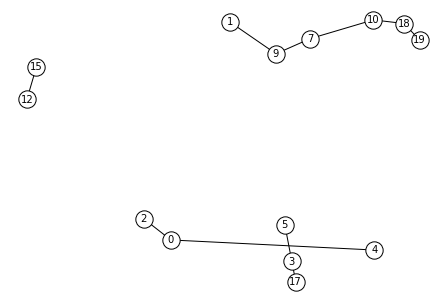

In [15]:
'''
draw(G, pos=None, ax=None, **kwds)
    Draw the graph G with Matplotlib.
    
    Draw the graph as a simple representation with no node
    labels or edge labels and using the full Matplotlib figure area
    and no axis labels by default.  See draw_networkx() for more
    full-featured drawing that allows title, axis labels etc.
    
    Parameters
    ----------
    G : graph
       A networkx graph
    
    pos : dictionary, optional
       A dictionary with nodes as keys and positions as values.
       If not specified a spring layout positioning will be computed.
       See :py:mod:`networkx.drawing.layout` for functions that
       compute node positions.
    
    ax : Matplotlib Axes object, optional
       Draw the graph in specified Matplotlib axes.
    
    kwds : optional keywords
       See networkx.draw_networkx() for a description of optional keywords.

'''

options = {
    "font_size": 10,
    "node_size": 300,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 1,
    "width": 1,
    "with_labels": True
}

nx.draw(G ,**options)
plt.show()

In [16]:
help(nx.draw_networkx)

Help on function draw_networkx in module networkx.drawing.nx_pylab:

draw_networkx(G, pos=None, arrows=True, with_labels=True, **kwds)
    Draw the graph G using Matplotlib.
    
    Draw the graph with Matplotlib with options for node positions,
    labeling, titles, and many other drawing features.
    See draw() for simple drawing without labels or axes.
    
    Parameters
    ----------
    G : graph
       A networkx graph
    
    pos : dictionary, optional
       A dictionary with nodes as keys and positions as values.
       If not specified a spring layout positioning will be computed.
       See :py:mod:`networkx.drawing.layout` for functions that
       compute node positions.
    
    arrows : bool, optional (default=True)
       For directed graphs, if True draw arrowheads.
       Note: Arrows will be the same color as edges.
    
    arrowstyle : str, optional (default='-|>')
        For directed graphs, choose the style of the arrowsheads.
        See :py:class: `matplo

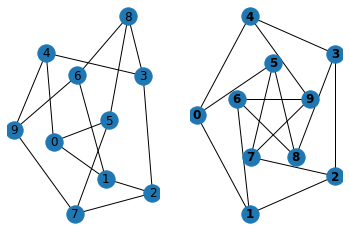

In [17]:
'''
draw_shell(G, **kwargs)
    Draw networkx graph with shell layout.
    
    Parameters
    ----------
    G : graph
       A networkx graph
    
    kwargs : optional keywords
       See networkx.draw_networkx() for a description of optional keywords,
       with the exception of the pos parameter which is not used by this
       function.

'''
pet = nx.petersen_graph()
plt.subplot(121)
nx.draw(pet, with_labels=True)
plt.subplot(122)
nx.draw_shell(pet, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

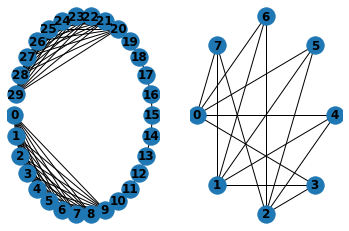

In [18]:
plt.subplot(122)
nx.draw_shell(K_3_5,with_labels=True, font_weight='bold')
plt.subplot(121)
nx.draw_shell(barbell,with_labels=True, font_weight='bold')
#nx.draw(lollipop,with_labels=True, font_weight='bold')
#nx.draw_shell(K_5,with_labels=True, font_weight='bold')

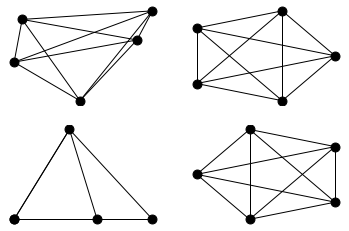

In [19]:
options = {
    'node_color': 'black',
    'node_size': 80,
    'width': 1,
}
plt.subplot(221)
nx.draw_random(K_5, **options)
plt.subplot(222)
nx.draw_circular(K_5, **options)
plt.subplot(223)
nx.draw_spectral(K_5, **options)
plt.subplot(224)
nx.draw_shell(K_5, **options)

In [22]:

def generate_a_random_graph( size = 10 ,random_weight =True,weight=1,threshold = 0.5,**kwargs):
    rand = lambda:np.random.random()
    graph = nx.Graph(**kwargs)
    for v in range(size):
        for u in range(size):
            random_val = rand()
            edge_weight = random_val if random_weight else weight
            if random_val > threshold and v!=u:
                graph.add_edge(u,v,weight = round(edge_weight,3))
    return graph

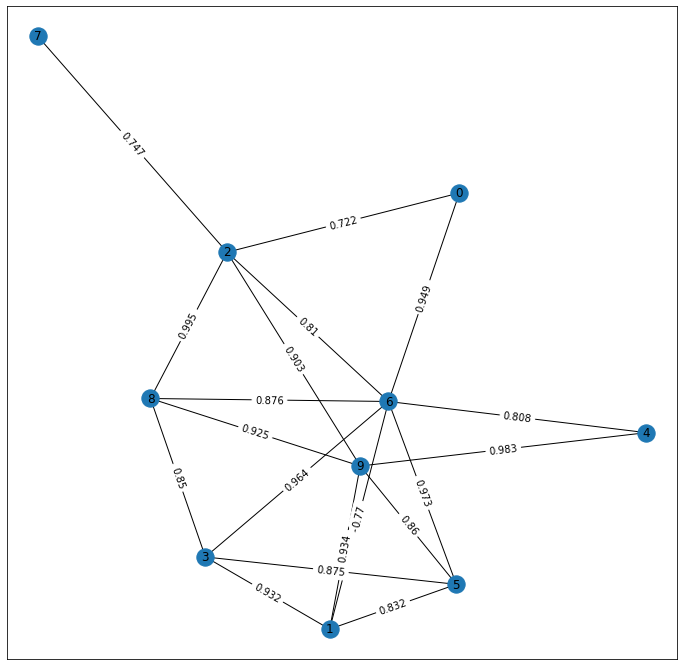

In [23]:
source = 0
size = 10
G = generate_a_random_graph(size = size ,threshold = 0.7) 
plt.figure(3,figsize=(12,12))
pos=nx.spring_layout(G); # pos = nx.nx_agraph.graphviz_layout(G)
nx.draw_networkx(G,pos);
labels = nx.get_edge_attributes(G,'weight');
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels);


In [24]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# shortest paths and path lengths between nodes in the graph.
# These algorithms work with undirected and directed graphs
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
target = size -1
print('~~~shortest path~~~')
print(nx.shortest_path(G)) # returns dictionary of shortest paths
print(nx.has_path(G, source, target)) # boolean
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Shortest path algorithms for weighed graphs.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
print('\n~~~weighed graph~~~')
#dijkstra
print(nx.dijkstra_predecessor_and_distance(G, source)) # returns dictionary of shortest path 
print(nx.dijkstra_path(G, source, target ))  # returns list
# Floyd Warshall
print(nx.floyd_warshall_numpy(G)) # returns a numpay array


~~~shortest path~~~
{5: {5: [5], 1: [5, 1], 3: [5, 3], 6: [5, 6], 9: [5, 9], 8: [5, 3, 8], 4: [5, 6, 4], 0: [5, 6, 0], 2: [5, 6, 2], 7: [5, 6, 2, 7]}, 1: {1: [1], 5: [1, 5], 9: [1, 9], 3: [1, 3], 6: [1, 6], 2: [1, 9, 2], 4: [1, 9, 4], 8: [1, 9, 8], 0: [1, 6, 0], 7: [1, 9, 2, 7]}, 9: {9: [9], 1: [9, 1], 2: [9, 2], 4: [9, 4], 5: [9, 5], 8: [9, 8], 3: [9, 1, 3], 6: [9, 1, 6], 0: [9, 2, 0], 7: [9, 2, 7]}, 0: {0: [0], 2: [0, 2], 6: [0, 6], 7: [0, 2, 7], 9: [0, 2, 9], 8: [0, 2, 8], 4: [0, 6, 4], 5: [0, 6, 5], 1: [0, 6, 1], 3: [0, 6, 3]}, 2: {2: [2], 0: [2, 0], 7: [2, 7], 9: [2, 9], 6: [2, 6], 8: [2, 8], 1: [2, 9, 1], 4: [2, 9, 4], 5: [2, 9, 5], 3: [2, 6, 3]}, 7: {7: [7], 2: [7, 2], 0: [7, 2, 0], 9: [7, 2, 9], 6: [7, 2, 6], 8: [7, 2, 8], 1: [7, 2, 9, 1], 4: [7, 2, 9, 4], 5: [7, 2, 9, 5], 3: [7, 2, 6, 3]}, 3: {3: [3], 1: [3, 1], 8: [3, 8], 5: [3, 5], 6: [3, 6], 9: [3, 1, 9], 2: [3, 8, 2], 4: [3, 6, 4], 0: [3, 6, 0], 7: [3, 8, 2, 7]}, 8: {8: [8], 3: [8, 3], 2: [8, 2], 6: [8, 6], 9: [8, 9], 1: [

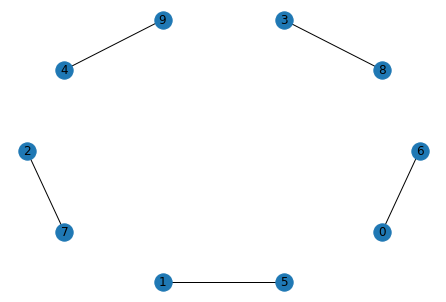

In [25]:
max_weight_matching = nx.Graph(nx.max_weight_matching(G))
nx.draw_shell(max_weight_matching , with_labels=True)

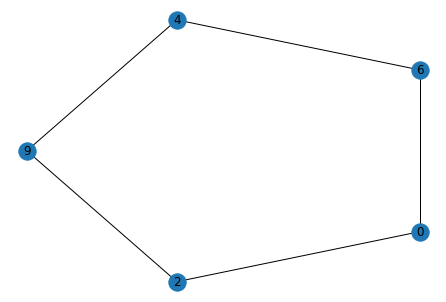

In [26]:
cycle = nx.Graph(nx.find_cycle(G))
nx.draw_shell(cycle , with_labels=True)